In [10]:
#LIBRARIES:

In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [38]:
import os
for dirname, _, filenames in os.walk('./processed.cleveland.data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [39]:
data = pd.read_csv('./processed.cleveland.data')
print('Shape of the data is ', data.shape)



Shape of the data is  (302, 14)


In [40]:
data.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   63.0    302 non-null    float64
 1   1.0     302 non-null    float64
 2   1.0.1   302 non-null    float64
 3   145.0   302 non-null    float64
 4   233.0   302 non-null    float64
 5   1.0.2   302 non-null    float64
 6   2.0     302 non-null    float64
 7   150.0   302 non-null    float64
 8   0.0     302 non-null    float64
 9   2.3     302 non-null    float64
 10  3.0     302 non-null    float64
 11  0.0.1   302 non-null    object 
 12  6.0     302 non-null    object 
 13  0       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [42]:
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
data




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [43]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [44]:
# Function for insighting summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(data[col].isnull().sum()/data.shape[0]*100, 2))
    print("num_of_nulls   : ", data[col].isnull().sum())
    print("num_of_uniques : ", data[col].nunique())
    print(data[col].value_counts(dropna = False))

In [45]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [46]:
first_looking("num")

column name    :  num
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
0    163
1     55
2     36
3     35
4     13
Name: num, dtype: int64


In [20]:
data = data[data['num'] <= 1] # drop the wong thal value

In [21]:
first_looking("ca")

column name    :  ca
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
0.0    155
1.0     40
2.0     13
3.0      6
?        4
Name: ca, dtype: int64


In [22]:
first_looking("thal")

column name    :  thal
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
3.0    151
7.0     58
6.0      8
?        1
Name: thal, dtype: int64


In [23]:
data["ca"]=data["ca"].replace("?", "4.0")
data["thal"]=data["thal"].replace("?", "0.0")


In [24]:
data['ca']=data['ca'].astype(float)
data['thal']=data['thal'].astype(float)


In [25]:
data.shape

(218, 14)

In [26]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [27]:
data = data[data['ca'] <= 3.0] #drop the wrong ca values
data = data[data['thal'] != 0.0]
# drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')

The length of the data now is 213 instead of 303!


In [28]:
data.shape

(213, 14)

In [29]:
first_looking("num")

column name    :  num
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
0    159
1     54
Name: num, dtype: int64


0    159
1     54
Name: num, dtype: int64


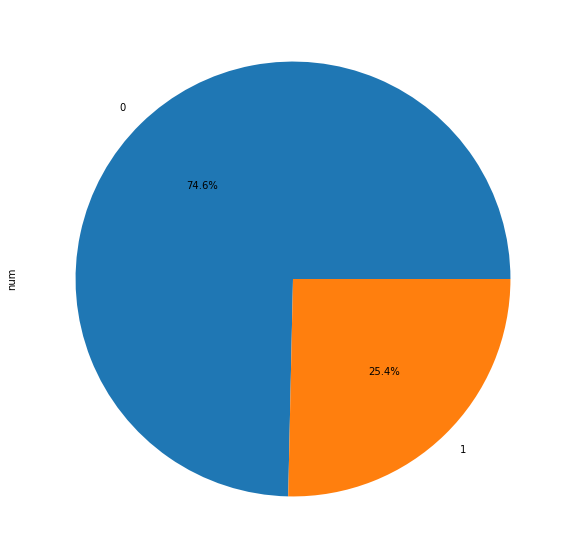

In [30]:
print(data['num'].value_counts())
data['num'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10));

In [31]:
data[data['num']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
age,159.000000,52.578616,9.545616,29.000000,44.500000,52.000000,59.000000,76.000000
sex,159.000000,0.553459,0.498705,0.000000,0.000000,1.000000,1.000000,1.000000
cp,159.000000,2.805031,0.917330,1.000000,2.000000,3.000000,3.000000,4.000000
trestbps,159.000000,129.075472,16.377102,94.000000,120.000000,130.000000,140.000000,180.000000
chol,159.000000,243.559748,53.920897,126.000000,208.500000,236.000000,268.500000,564.000000
fbs,159.000000,0.138365,0.346373,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,159.000000,0.836478,0.986454,0.000000,0.000000,0.000000,2.000000,2.000000
thalach,159.000000,158.635220,19.091194,96.000000,149.000000,161.000000,172.000000,202.000000
exang,159.000000,0.144654,0.352863,0.000000,0.000000,0.000000,0.000000,1.000000
oldpeak,159.000000,0.588050,0.777888,0.000000,0.000000,0.200000,1.050000,4.200000


In [32]:
data[data['num']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
age,54.000000,55.611111,7.891760,35.000000,51.250000,57.000000,60.750000,70.000000
sex,54.000000,0.833333,0.376177,0.000000,1.000000,1.000000,1.000000,1.000000
cp,54.000000,3.333333,1.009390,1.000000,3.000000,4.000000,4.000000,4.000000
trestbps,54.000000,133.277778,18.196430,108.000000,120.000000,130.000000,143.750000,192.000000
chol,54.000000,249.148148,41.132738,149.000000,224.500000,249.000000,275.750000,335.000000
fbs,54.000000,0.055556,0.231212,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,54.000000,1.148148,0.998251,0.000000,0.000000,2.000000,2.000000,2.000000
thalach,54.000000,145.981481,23.053253,88.000000,131.000000,150.000000,161.000000,195.000000
exang,54.000000,0.444444,0.501570,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,54.000000,1.022222,0.994829,0.000000,0.000000,0.800000,1.800000,3.600000


In [33]:
numerical= data.drop(['num'], axis=1).select_dtypes('number').columns

print(f'Numerical Columns:  {data[numerical].columns}')

Numerical Columns:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [34]:
data[numerical].iplot(kind='histogram', subplots=True,bins=50)

In [35]:
for i in numerical:
    data[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

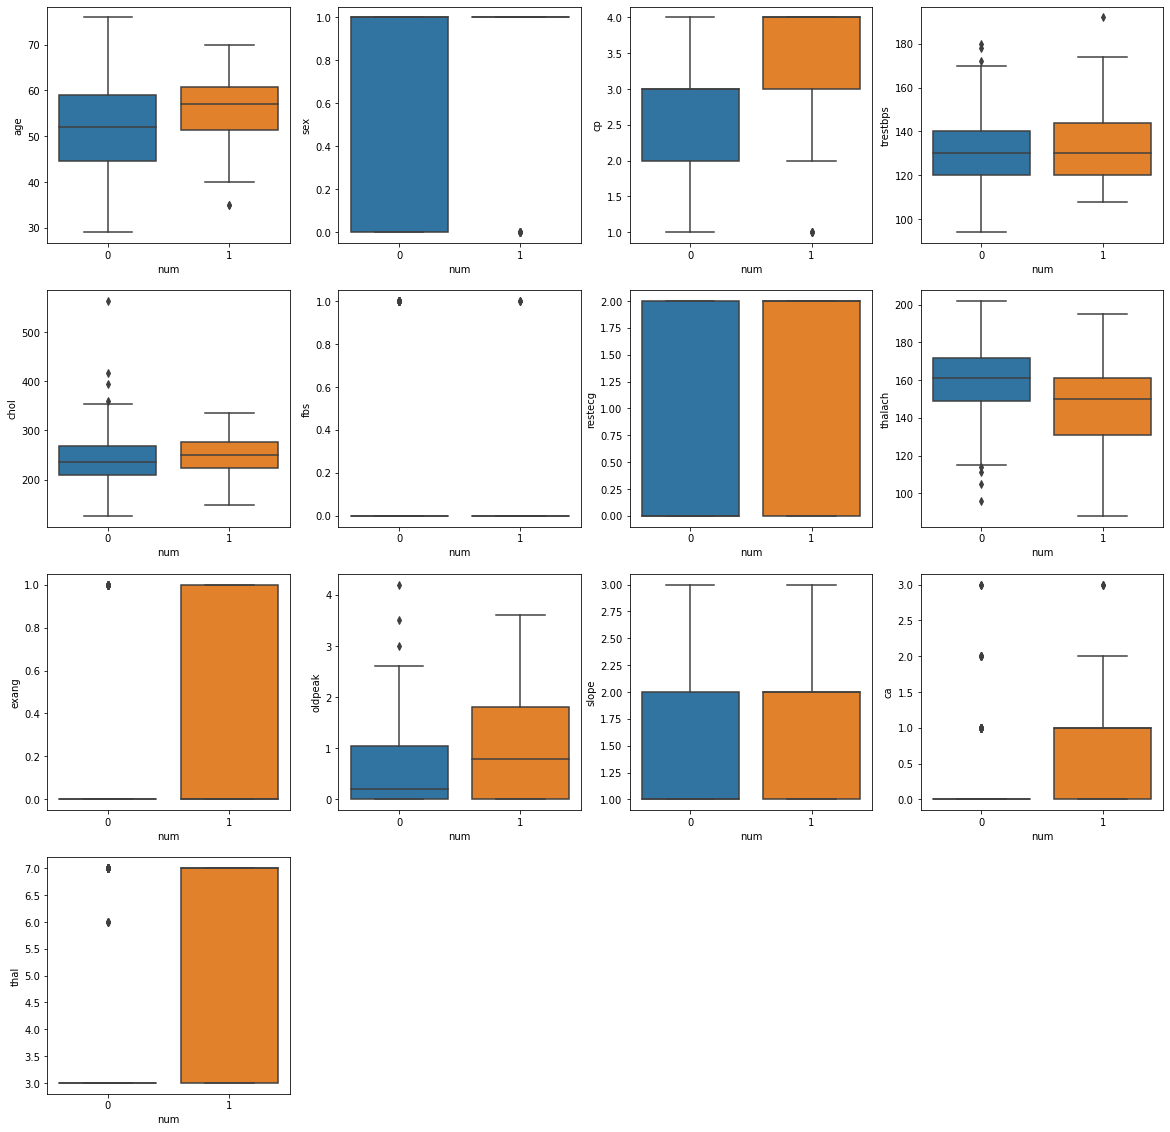

In [36]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "num":
        index += 1
        plt.subplot(4, 4, index)
        sns.boxplot(x='num', y=feature, data=data)

In [219]:
X = data.drop(["num"], axis=1)
y = data["num"]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state = 101)

In [221]:
# Function for determining the number and percentages of missing values

def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [222]:
missing(data)

,Missing_Number,Missing_Percent
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


In [223]:
# The Implementation of Scaling

scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [224]:
X_train_scaled = scaler.fit_transform(X_train)

In [225]:
X_test_scaled = scaler.transform(X_test)

C:\Users\Home\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[20:24:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[21  3]
 [ 2  6]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.67      0.75      0.71         8

    accuracy                           0.84        32
   macro avg       0.79      0.81      0.80        32
weighted avg       0.85      0.84      0.85        32

--------------------------------------------------------


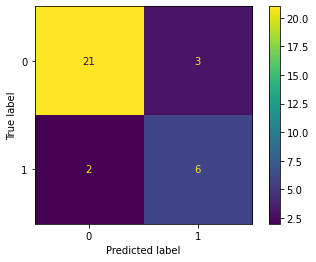

In [226]:
XGB_model = XGBClassifier(random_state=101)
XGB_model.fit(X_train_scaled, y_train)
y_pred = XGB_model.predict(X_test_scaled)
y_train_pred = XGB_model.predict(X_train_scaled)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")

plot_confusion_matrix(XGB_model, X_test_scaled, y_test)





In [227]:
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [228]:
train_val(y_train, y_train_pred, y_test, y_pred)

,train_set,test_set
Accuracy,1.0,0.843750
Precision,1.0,0.666667
Recall,1.0,0.750000
f1,1.0,0.705882
